# Names: Lara Mechling, Corrina Hanson, Isaac Liem
## Date: 11/19/2022
## Course: DSC 450

# Title: Predicting Employee Attrition

### Corrina Hanson - Data Wrangler

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.preprocessing import MinMaxScaler

In [2]:
# import data, remove three columns, and preview

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.drop('EmployeeCount', inplace = True, axis = 1)
df.drop('EmployeeNumber', inplace = True, axis = 1)
df.drop('StandardHours', inplace = True, axis = 1)
df.drop('Over18', inplace = True, axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [3]:
# view df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [4]:
# create lists for number and categorical features

num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction','HourlyRate',
                'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
                'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                'YearsWithCurrManager']
cat_features = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

C:\Users\corri\AppData\Local\Temp\ipykernel_19188\252974587.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax= plt.subplots(figsize= (8, 4))


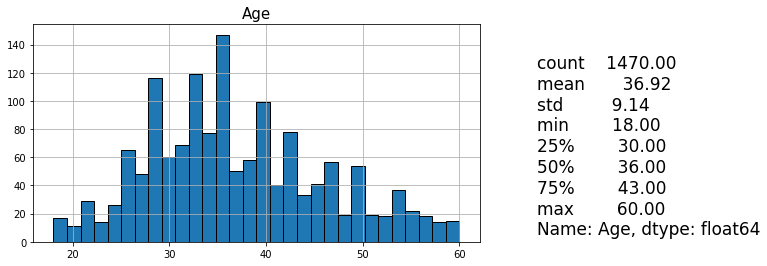

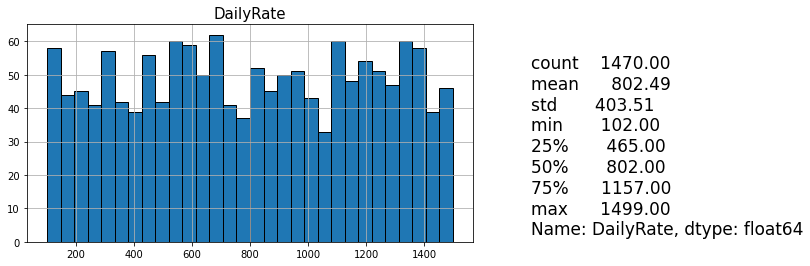

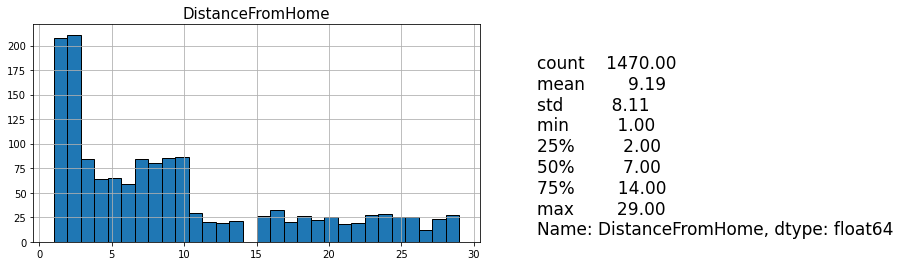

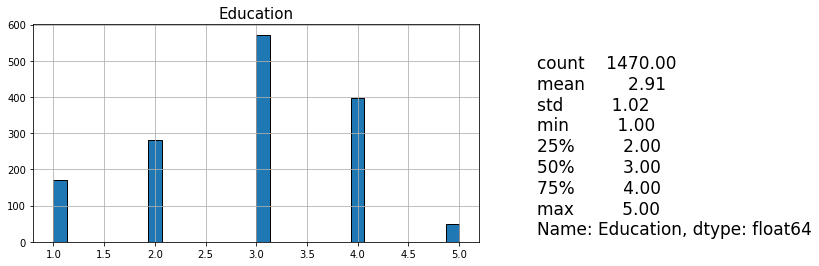

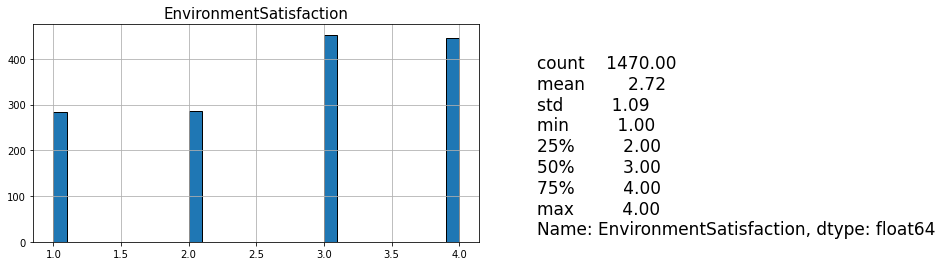

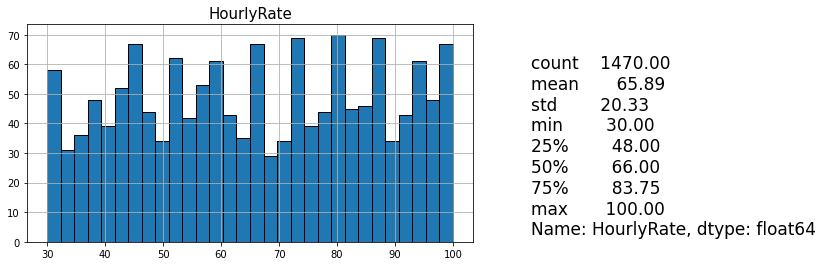

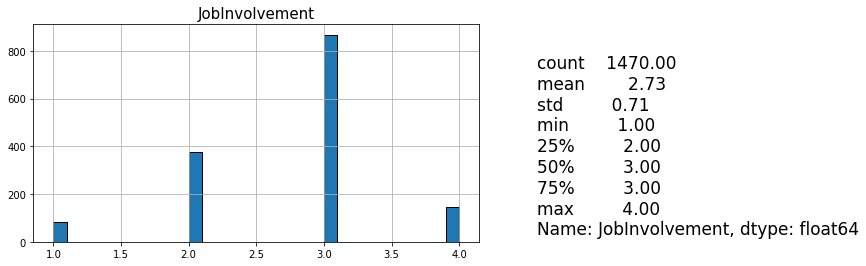

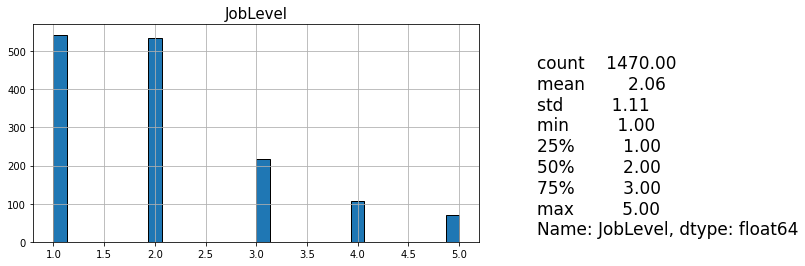

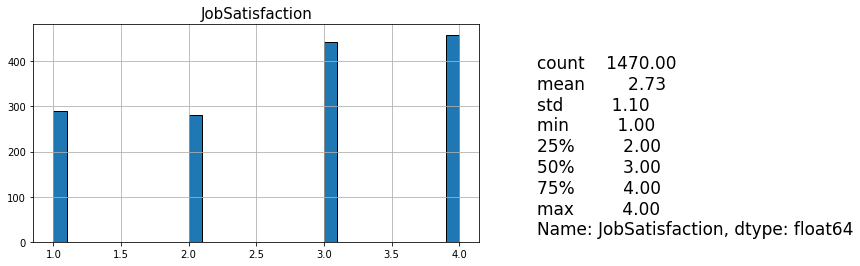

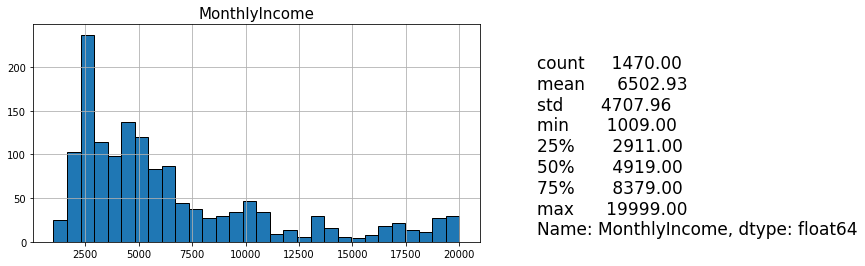

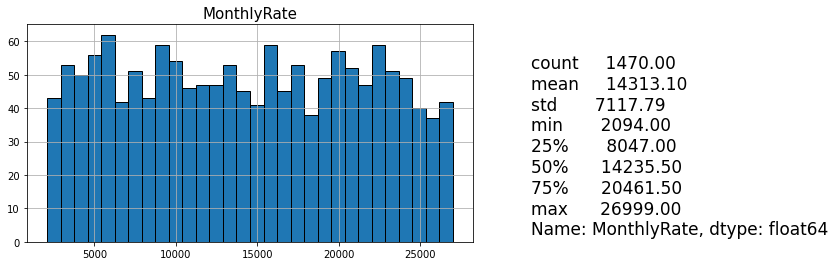

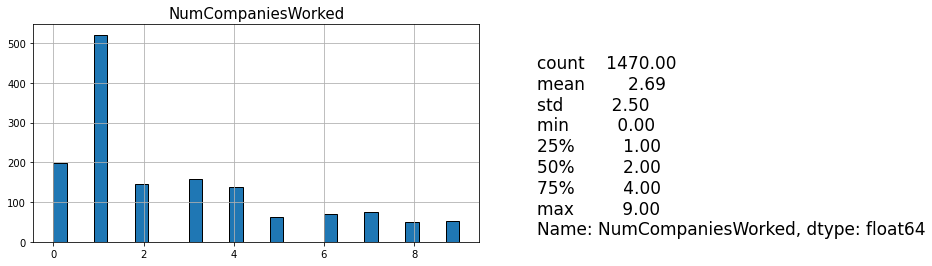

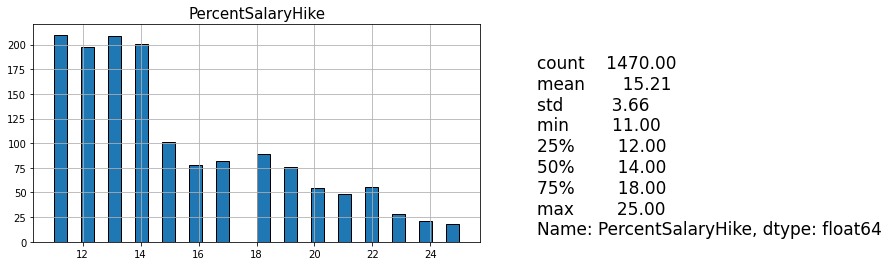

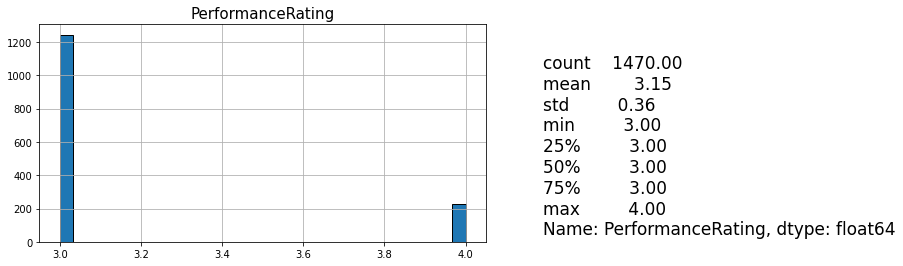

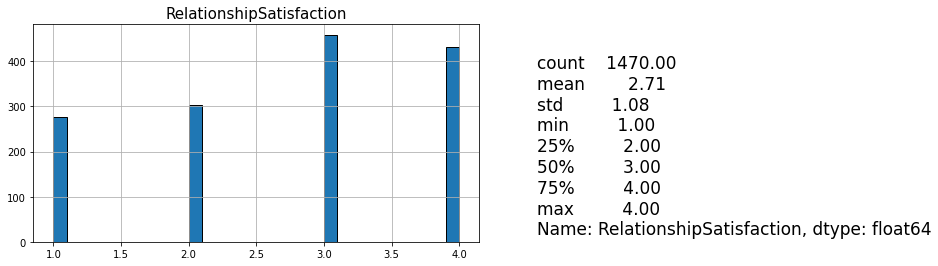

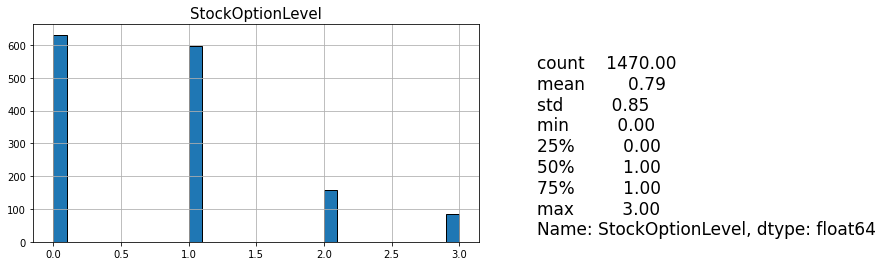

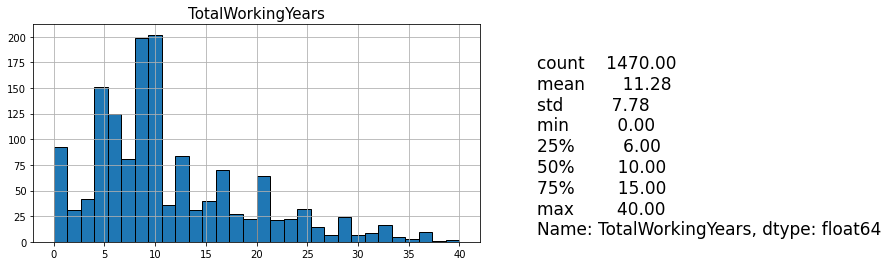

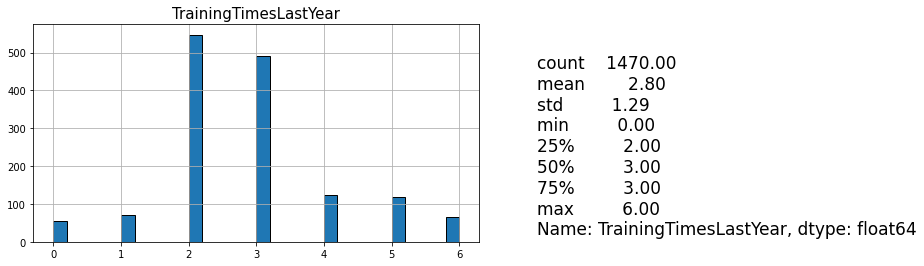

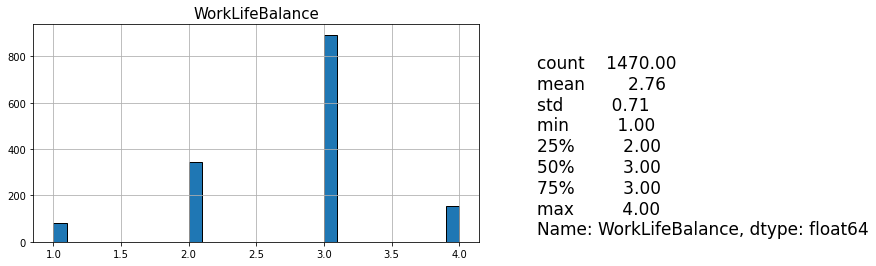

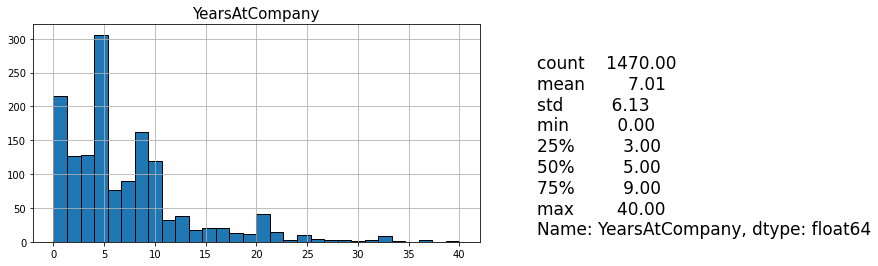

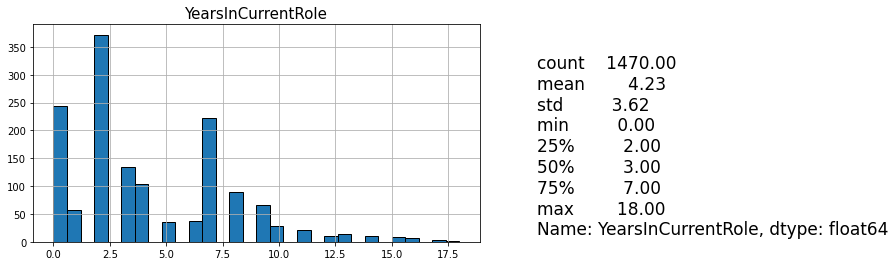

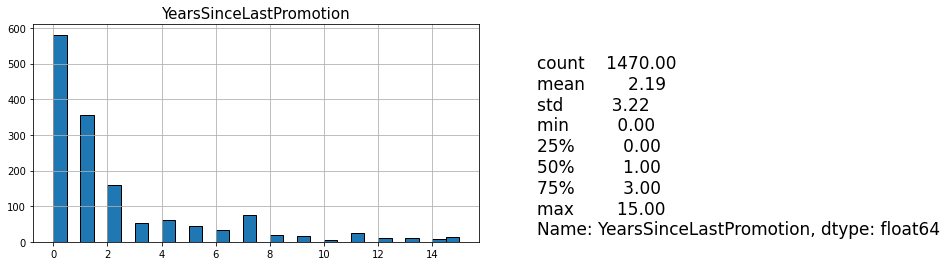

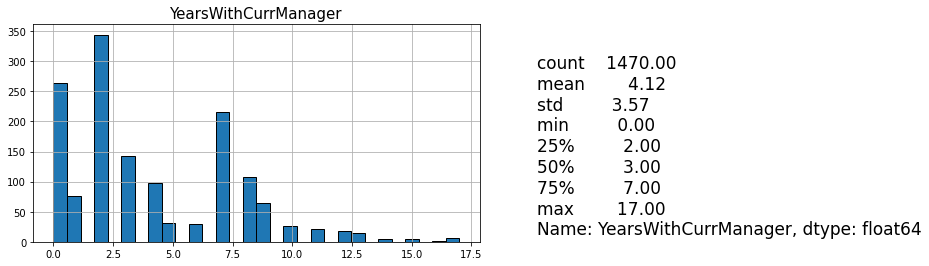

In [5]:
# histograms of numerical features

'''
Hands On Predictive Analytics with Python
Alvaro Fuentes
'''

def desc_num_feature(feature_name, bins= 30, edgecolor= 'k', **kwargs):
    fig, ax= plt.subplots(figsize= (8, 4))
    df[feature_name].hist(bins= bins, edgecolor= edgecolor, ax= ax, **kwargs)
    ax.set_title(feature_name, size= 15)
    plt.figtext(1, 0.15, str(df[feature_name].describe().round(2)), size= 17)
    
# view histograms of numerical features

for column in num_features:
    desc_num_feature(column)

     count  percent
No    1233     83.9
Yes    237     16.1


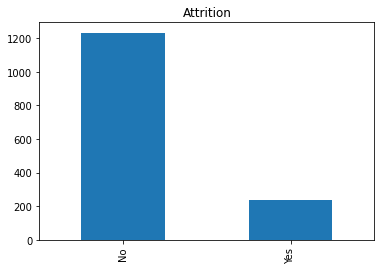

In [6]:
# bar charts of categorical features

'''
Hands On Predictive Analytics with Python
Alvaro Fuentes
'''

def cat_feature_bar_chart(feature):
    count= df[feature].value_counts()
    percent= 100 * df[feature].value_counts(normalize= True)
    df2= pd.DataFrame({'count': count, 'percent': percent.round(1)})
    print(df2)
    count.plot(kind= 'bar', title= feature)
    
# view categoical bar chart

cat_feature_bar_chart('Attrition')  

# we can view all of these if we need to but I won't include them for now

In [1]:
# pandas profile

# pandas_profiling.ProfileReport(df)

In [7]:
# change attrition to yes=1 and no=0

cleanup = {'Attrition': {'No': 0, 'Yes': 1}}
df = df.replace(cleanup)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [8]:
# one hot encoding categorical values

BusinessTravel = pd.get_dummies(df.BusinessTravel, prefix = 'BusinessTravel')
Department = pd.get_dummies(df.Department, prefix = 'Department')
EducationField = pd.get_dummies(df.EducationField, prefix = 'EducationField')
Gender = pd.get_dummies(df.Gender, prefix = 'Gender')
JobRole = pd.get_dummies(df.JobRole, prefix = 'JobRole')
MaritalStatus = pd.get_dummies(df.MaritalStatus, prefix = 'MaritalStatus')
OverTime = pd.get_dummies(df.OverTime, prefix = 'OverTime')

In [9]:
# reset index and bring all data together

df = df.reset_index()
df = pd.concat([df, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime], axis = 1)
df.head()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,0,0,0,1,0,0,0,1,0,1
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,0,0,1,0,0,0,1,0,1,0
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,0,0,0,0,0,0,0,1,0,1
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,0,0,1,0,0,0,1,0,0,1
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,0,0,0,0,0,0,1,0,1,0


In [10]:
# drop duplicate columns

df = df.drop('BusinessTravel', axis = 1)
df = df.drop('Department', axis = 1)
df = df.drop('EducationField', axis = 1)
df = df.drop('Gender', axis = 1)
df = df.drop('JobRole', axis = 1)
df = df.drop('MaritalStatus', axis = 1)
df = df.drop('OverTime', axis = 1)
df = df.drop('index', axis = 1)

df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [11]:
# scale numerical columns

scale_num_features = ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                      'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                      'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaler = MinMaxScaler()

In [12]:
scaler.fit(df[scale_num_features])

MinMaxScaler()

In [13]:
df.loc[:, scale_num_features] = scaler.transform(df[scale_num_features])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,1,0.715820,0.000000,2,2,0.914286,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,0.738095,0,0.126700,0.250000,1,3,0.442857,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,0.452381,1,0.909807,0.035714,2,4,0.885714,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,0.357143,0,0.923407,0.071429,4,4,0.371429,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,0.214286,0,0.350036,0.035714,1,1,0.142857,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [14]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.161224,0.501421,0.292590,2.912925,2.721769,0.512731,2.729932,2.063946,2.728571,...,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,0.717007,0.282993
std,0.217509,0.367863,0.288840,0.289531,1.024165,1.093082,0.290420,0.711561,1.106940,1.102846,...,0.298279,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.450606,0.450606
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,0.259843,0.035714,2.000000,2.000000,0.257143,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.000000,0.501074,0.214286,3.000000,3.000000,0.514286,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.595238,0.000000,0.755190,0.464286,4.000000,4.000000,0.767857,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,1.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
